# Donchain Channel Indicator

https://admiralmarkets.com/education/articles/forex-indicators/what-everyone-should-know-about-the-donchian-channel-indicator

http://www.chart-formations.com/indicators/donchian-channel.aspx?cat=trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
df['Upper_Channel_Line'] = pd.Series.rolling(df['High'], window=20).max()
df['Lower_Channel_Line'] = pd.Series.rolling(df['Low'], window=20).min()
df['Middle_Channel_Line'] = (df['Upper_Channel_Line'] + df['Lower_Channel_Line'])/2
df = df.dropna()

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Middle_Channel_Line
Date,,,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200,184.940002,146.589996,165.764999
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500,184.940002,146.589996,165.764999
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100,184.940002,146.589996,165.764999
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400,184.940002,146.589996,165.764999
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500,184.940002,146.589996,165.764999


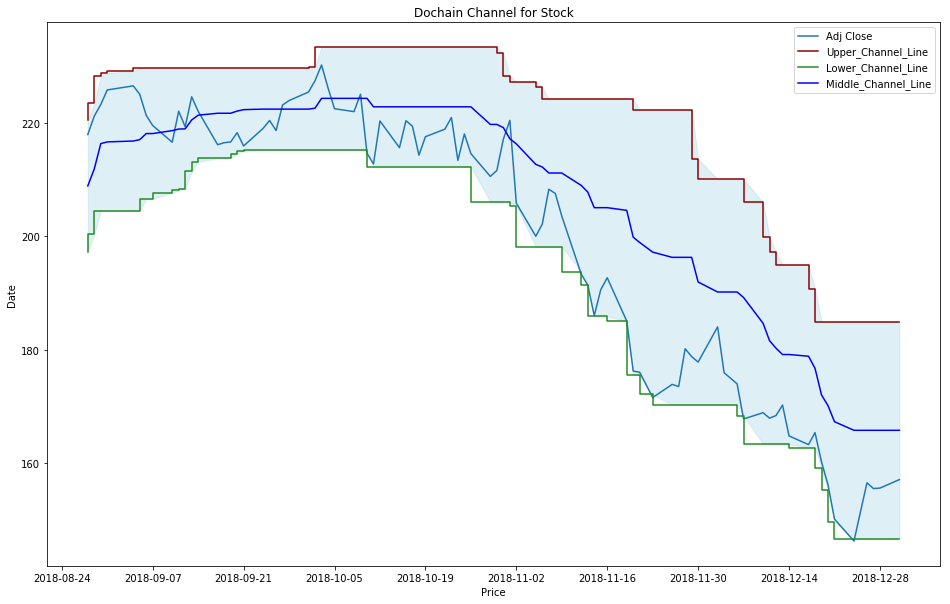

In [5]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.fill_between(df.index, df['Lower_Channel_Line'], df['Upper_Channel_Line'],  color='lightblue', alpha=0.4)
plt.plot(df['Upper_Channel_Line'], c='darkred', linestyle='-', drawstyle="steps")
plt.plot(df['Lower_Channel_Line'], c='forestgreen', linestyle='-', drawstyle="steps")
plt.plot(df['Middle_Channel_Line'], c='blue', linestyle='-')
plt.title('Dochain Channel for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

## Candlestick with Donchain Channel

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Middle_Channel_Line,VolumePositive
0,736934.0,219.009995,220.539993,218.919998,219.699997,218.001129,22776800,220.539993,197.309998,208.924996,False
1,736935.0,220.149994,223.490005,219.410004,222.979996,221.255753,27254800,223.490005,200.350006,211.920006,True
2,736936.0,223.250000,228.259995,222.399994,225.029999,223.289917,48793800,228.259995,204.520004,216.390000,True
3,736937.0,226.509995,228.869995,226.000000,227.630005,225.869812,43340100,228.869995,204.520004,216.694999,False
4,736941.0,228.410004,229.179993,226.630005,228.360001,226.594162,27390100,229.179993,204.520004,216.849999,False


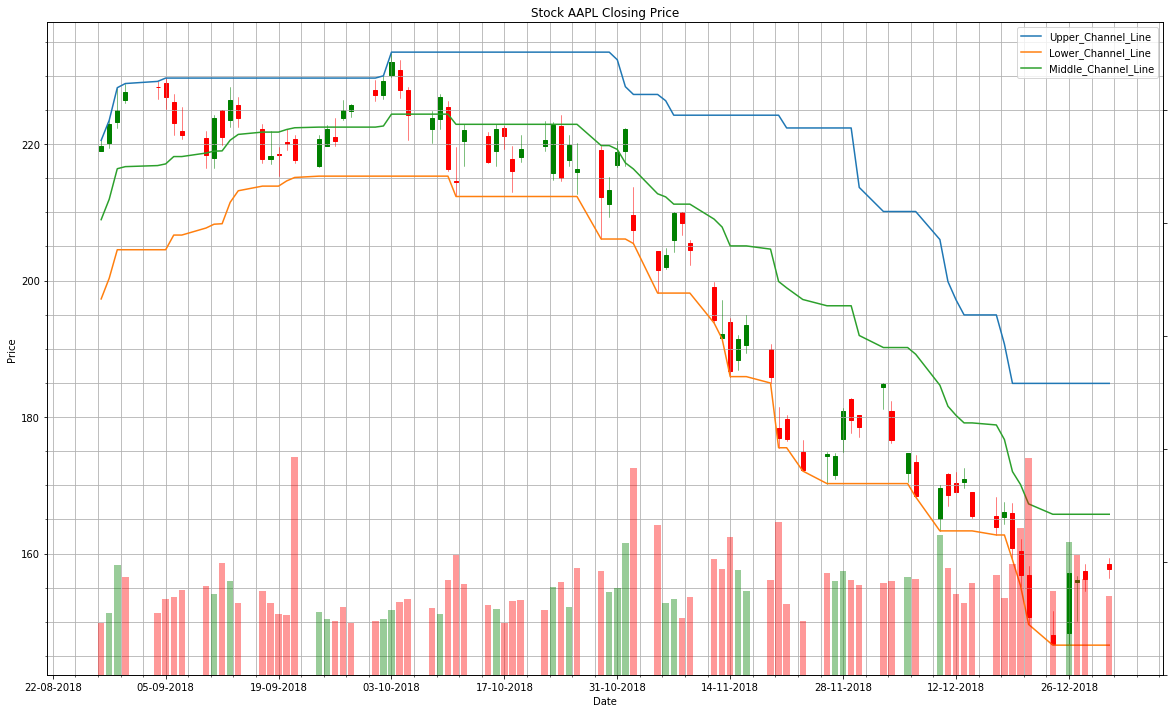

In [7]:
from mpl_finance import candlestick_ohlc

fig, ax1 = plt.subplots(figsize=(20,12))
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
#colors = ['red', 'green', 'blue']
#labels = ['Upper Channel Line', 'Lower Channel Line', 'Middle Channel Line']
for i in dfc[['Upper_Channel_Line', 'Lower_Channel_Line', 'Middle_Channel_Line']]:
    ax1.plot(dfc['Date'], dfc[i])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')